### Necessary libraries

In [1]:
import os
import sys
import time
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import KFold, cross_val_score, RandomizedSearchCV, train_test_split

### Paths

In [2]:
#REPOSITORY PATH OF PROJECT
(Tempo,_) = os.path.split(os.getcwd())
Tempo,_ = os.path.split(Tempo)
PATH_PROJECT,DEV = os.path.split(Tempo)
PATH_DEV = os.path.join(PATH_PROJECT,'Dev')
PATH_DATA = os.path.join(PATH_PROJECT,'Data')
PATH_DATA_IMAGES = os.path.join(PATH_DATA,'Data Images')
DATA_CBIRH_5_500 = os.path.join(PATH_DATA_IMAGES,'DATA_CBIRH_5_500')
PATH_DATA_CSV = os.path.join(os.path.join(os.path.join(PATH_DATA,'Data Descriptors'),'Data Feautures_5_500'),'Three Descriptors')
LIST_CLASS = os.listdir(PATH_DATA_CSV)
print(LIST_CLASS)

['DF_CH_FG_HM.csv', 'DF_CH_FG_SIFT.csv', 'DF_CH_GCM_HM.csv', 'DF_CH_GCM_SIFT.csv', 'DF_CH_TH_HM.csv', 'DF_CH_TH_SIFT-L2621232.csv', 'DF_CH_TH_SIFT.csv', 'DF_DCD_FG_HM.csv', 'DF_DCD_FG_SIFT.csv', 'DF_DCD_GCM_HM.csv', 'DF_DCD_GCM_sift.csv', 'DF_DCD_TH_HM.csv', 'DF_DCD_TH_SIFT.csv', 'test.csv']


### Methods

In [5]:
# build path
def path_build(PATH_DATA_CSV):
    List_DF = []
    List_DF_without_header = []
    for i in os.listdir(PATH_DATA_CSV):
        if i.find('SIFT') !=-1:
            List_DF_without_header.append((i,PATH_DATA_CSV+"/"+i))
        else:
            List_DF.append((i,PATH_DATA_CSV+"/"+i))
    return List_DF,List_DF_without_header

#split data to X,y
def split_data(path):
    DF = pd.read_csv(path)
    DF = DF.iloc[:,1::] 
    y =  DF.label 
    del DF['label']
    X = DF
    return X,y

def split_data_without_head(path):
    DF = pd.read_csv(path)
    DF = DF.iloc[:,1::] 
    y =  y=DF[DF.columns[-1]] 
    del DF[DF.columns[-1]]
    X = DF
    return X,y

def plot_confusion_catrix(cm):
    
    sb.set(rc={'figure.figsize':(8,8)})
    sb.set(font_scale=1.4)#for label size
    ax = sb.heatmap(cm, annot=True, cmap ='Oranges', cbar=False)
    ax.set_title('Confusion Matrix with labels\n')
    ax.set_xlabel('\nPredicted Label')
    ax.set_ylabel('\nTrue Label ')
    _= ax.xaxis.set_ticklabels(['CAR','DOG','FRUIT','PERSON','CAT'])
    _= ax.yaxis.set_ticklabels(['CAR','DOG','FRUIT','PERSON','CAT'])

#Evaluate model
def evaluate(model, test_features, test_labels): 
    predictions = model.predict(test_features)
    accuracy = accuracy_score(test_labels, predictions)
    errors = 1-accuracy
    Confusion_Matrix = confusion_matrix(test_labels, predictions)
    print('Model Performance')
    print('Average Error: {:0.2f} %.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    print('Classification_report :\n',classification_report(test_labels,predictions))
    print('Confusion_Matrix : \n')
    plot_confusion_catrix(Confusion_Matrix)  

#tuning hyperparameter of model       
def Hyperparameter_tuning_GaussianNB(xtrain,ytrain, X_test, y_test):
    start = time.time()
    nbc = GaussianNB()
    param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}
    kf = KFold(n_splits=5, random_state = 0, shuffle = True)
    randomizedsearch = RandomizedSearchCV(estimator=nbc, param_distributions=param_grid,scoring='accuracy', cv= kf)
    randomizedsearch.fit(xtrain, ytrain)
    end = time.time()
    run_time = end - start
    print("[INFO] Applying took {:.2f} seconds".format(run_time))
    return randomizedsearch

## DF_CH_GCM_HM

In [12]:
List_DF,_ = path_build(PATH_DATA_CSV)
print("Data Features Study : ",List_DF[0][0])
#Data preparation
X,y = split_data(List_DF[0][1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
#Train data whith cross validation using Kfold = 5 and shuffle = True
randomizedsearch = Hyperparameter_tuning_GaussianNB(X_train,y_train, X_test, y_test)
#Using best estimator
clf = randomizedsearch.best_estimator_

Data Features Study :  DF_CH_GCM_HM.csv
[INFO] Applying took 0.14 seconds


Model Performance
Average Error: 0.18 %.
Accuracy = 0.82%.
Classification_report :
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       0.92      0.96      0.94        25
           2       0.60      0.81      0.69        26
           3       0.93      1.00      0.97        28
           4       0.73      0.33      0.46        24

    accuracy                           0.82       125
   macro avg       0.83      0.82      0.81       125
weighted avg       0.83      0.82      0.81       125

Confusion_Matrix : 



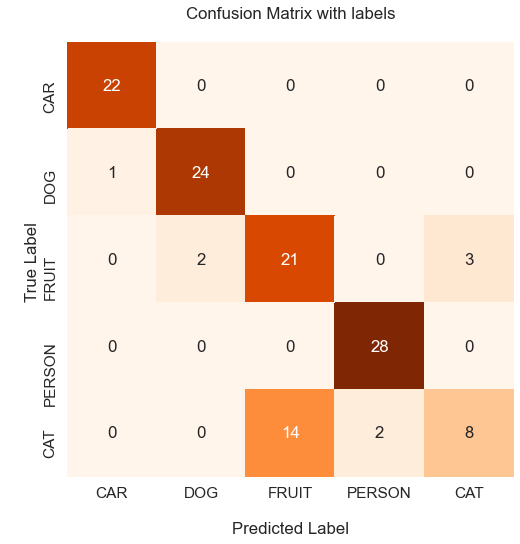

In [13]:
#evaluate best estimator
evaluate(clf,X_test,y_test)

## DF_CH_TH_HM

In [14]:
List_DF,_ = path_build(PATH_DATA_CSV)
print("Data Features Study : ",List_DF[1][0])
#Data preparation
X,y = split_data(List_DF[1][1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
#Train data whith cross validation using Kfold = 5 and shuffle = True
randomizedsearch = Hyperparameter_tuning_GaussianNB(X_train,y_train, X_test, y_test)
#Using best estimator
clf = randomizedsearch.best_estimator_

Data Features Study :  DF_CH_TH_HM.csv
[INFO] Applying took 0.15 seconds


Model Performance
Average Error: 0.20 %.
Accuracy = 0.80%.
Classification_report :
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        22
           1       0.96      0.92      0.94        25
           2       0.54      0.85      0.66        26
           3       0.97      1.00      0.98        28
           4       0.71      0.21      0.32        24

    accuracy                           0.80       125
   macro avg       0.82      0.79      0.77       125
weighted avg       0.82      0.80      0.77       125

Confusion_Matrix : 



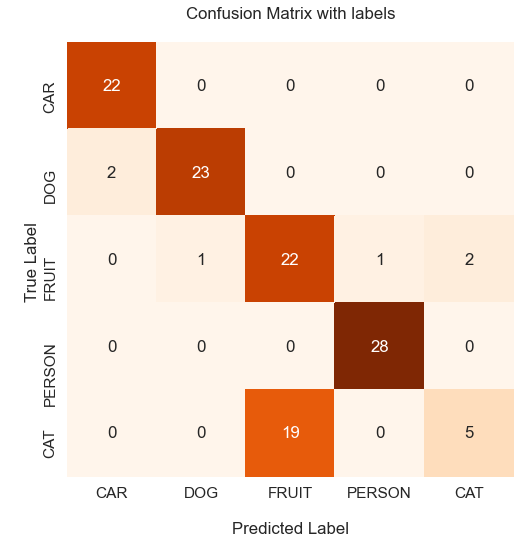

In [15]:
#evaluate best estimator
evaluate(clf,X_test,y_test)

## DF_DCD_GCM_HM

In [16]:
List_DF,_ = path_build(PATH_DATA_CSV)
print("Data Features Study : ",List_DF[2][0])
#Data preparation
X,y = split_data(List_DF[2][1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
#Train data whith cross validation using Kfold = 5 and shuffle = True
randomizedsearch = Hyperparameter_tuning_GaussianNB(X_train,y_train, X_test, y_test)
#Using best estimator
clf = randomizedsearch.best_estimator_

Data Features Study :  DF_DCD_GCM_HM.csv
[INFO] Applying took 0.14 seconds


Model Performance
Average Error: 0.28 %.
Accuracy = 0.72%.
Classification_report :
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        22
           1       0.74      0.80      0.77        25
           2       0.50      0.50      0.50        26
           3       0.77      0.96      0.86        28
           4       0.60      0.38      0.46        24

    accuracy                           0.72       125
   macro avg       0.71      0.72      0.71       125
weighted avg       0.71      0.72      0.71       125

Confusion_Matrix : 



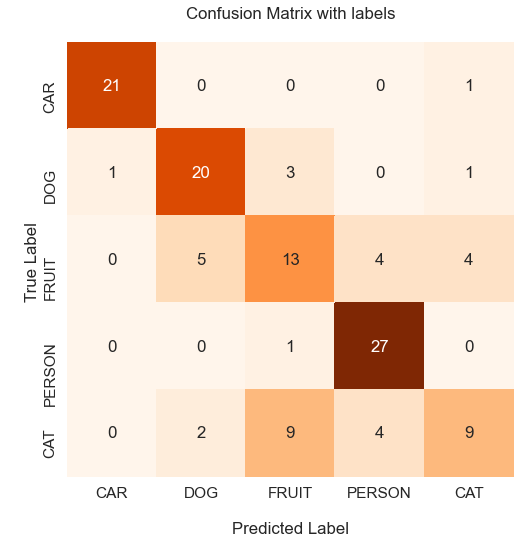

In [17]:
#evaluate best estimator
evaluate(clf,X_test,y_test)

## DF_DCD_TH_HM

In [18]:
List_DF,_ = path_build(PATH_DATA_CSV)
print("Data Features Study : ",List_DF[3][0])
#Data preparation
X,y = split_data(List_DF[3][1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
#Train data whith cross validation using Kfold = 5 and shuffle = True
randomizedsearch = Hyperparameter_tuning_GaussianNB(X_train,y_train, X_test, y_test)
#Using best estimator
clf = randomizedsearch.best_estimator_

Data Features Study :  DF_DCD_TH_HM.csv
[INFO] Applying took 0.19 seconds


Model Performance
Average Error: 0.22 %.
Accuracy = 0.78%.
Classification_report :
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       0.91      0.84      0.87        25
           2       0.50      0.77      0.61        26
           3       0.90      1.00      0.95        28
           4       0.75      0.25      0.38        24

    accuracy                           0.78       125
   macro avg       0.80      0.77      0.76       125
weighted avg       0.80      0.78      0.76       125

Confusion_Matrix : 



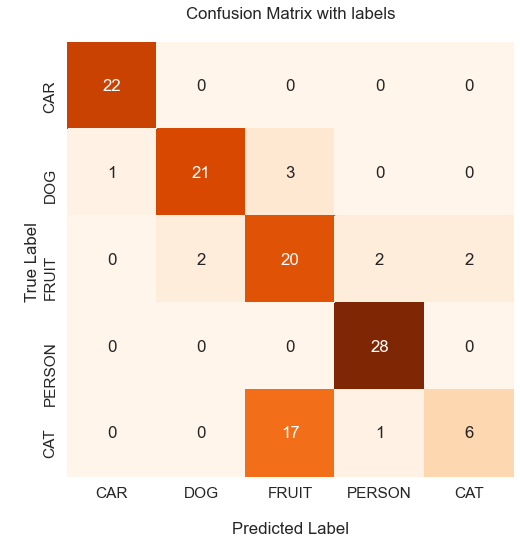

In [19]:
#evaluate best estimator
evaluate(clf,X_test,y_test)

## DF_CH_GCM_SIFT

In [20]:
_,List_DF_without_header = path_build(PATH_DATA_CSV)
print("Data Features Study : ",List_DF_without_header[0][0])
#Data preparation
X,y = split_data_without_head(List_DF_without_header[0][1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
#Train data whith cross validation using Kfold = 5 and shuffle = True
randomizedsearch = Hyperparameter_tuning_GaussianNB(X_train,y_train, X_test, y_test)
#Using best estimator
clf = randomizedsearch.best_estimator_

Data Features Study :  DF_CH_GCM_SIFT.csv
[INFO] Applying took 0.40 seconds


Model Performance
Average Error: 0.38 %.
Accuracy = 0.62%.
Classification_report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       0.71      1.00      0.83        25
           2       0.40      0.08      0.13        26
           3       0.48      0.82      0.61        28
           4       0.33      0.21      0.26        24

    accuracy                           0.62       125
   macro avg       0.59      0.62      0.56       125
weighted avg       0.57      0.62      0.55       125

Confusion_Matrix : 



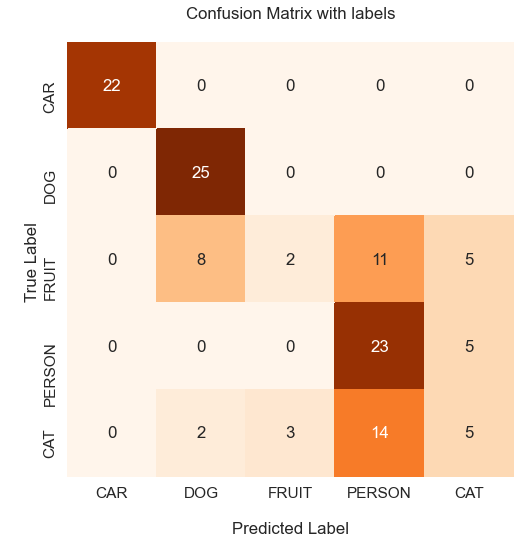

In [21]:
#evaluate best estimator
evaluate(clf,X_test,y_test)

## DF_CH_TH_SIFT

In [22]:
num_data_csv = 1
_,List_DF_without_header = path_build(PATH_DATA_CSV)
print("Data Features Study : ",List_DF_without_header[num_data_csv][0])
#Data preparation
X,y = split_data_without_head(List_DF_without_header[num_data_csv][1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
#Train data whith cross validation using Kfold = 5 and shuffle = True
randomizedsearch = Hyperparameter_tuning_GaussianNB(X_train,y_train, X_test, y_test)
#Using best estimator
clf = randomizedsearch.best_estimator_

Data Features Study :  DF_CH_TH_SIFT.csv
[INFO] Applying took 0.38 seconds


Model Performance
Average Error: 0.46 %.
Accuracy = 0.54%.
Classification_report :
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       0.70      0.84      0.76        25
           2       0.43      0.12      0.18        26
           3       0.34      0.46      0.39        28
           4       0.30      0.33      0.31        24

    accuracy                           0.54       125
   macro avg       0.54      0.55      0.53       125
weighted avg       0.53      0.54      0.51       125

Confusion_Matrix : 



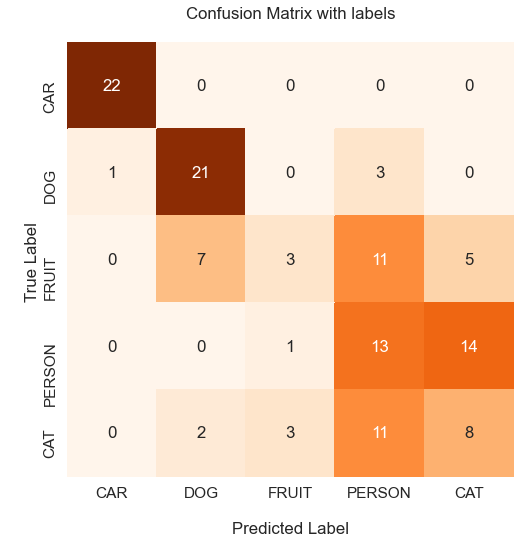

In [23]:
#evaluate best estimator
evaluate(clf,X_test,y_test)

## DF_DCD_GCM_SIFT

In [33]:
num_data_csv = 2
_,List_DF_without_header = path_build(PATH_DATA_CSV)
print("Data Features Study : ",List_DF_without_header[num_data_csv][0])
#Data preparation
X,y = split_data_without_head(List_DF_without_header[num_data_csv][1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
#Train data whith cross validation using Kfold = 5 and shuffle = True
randomizedsearch = Hyperparameter_tuning_GaussianNB(X_train,y_train, X_test, y_test)
#Using best estimator
clf = randomizedsearch.best_estimator_

Data Features Study :  DF_DCD_GCM_SIFT.csv
[INFO] Applying took 0.40 seconds


Model Performance
Average Error: 0.50 %.
Accuracy = 0.50%.
Classification_report :
               precision    recall  f1-score   support

           0       1.00      0.68      0.81        22
           1       0.67      0.96      0.79        25
           2       0.35      0.23      0.28        26
           3       0.33      0.32      0.33        28
           4       0.30      0.38      0.33        24

    accuracy                           0.50       125
   macro avg       0.53      0.51      0.51       125
weighted avg       0.52      0.50      0.50       125

Confusion_Matrix : 



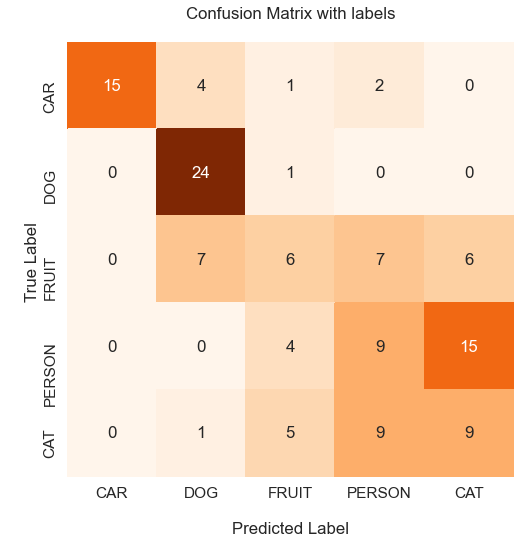

In [34]:
#evaluate best estimator
evaluate(clf,X_test,y_test)

## DF_DCD_TH_SIFT

In [47]:
num_data_csv = 3
_,List_DF_without_header = path_build(PATH_DATA_CSV)
print("Data Features Study : ",List_DF_without_header[num_data_csv][0])
#Data preparation
X,y = split_data_without_head(List_DF_without_header[num_data_csv][1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
#Train data whith cross validation using Kfold = 5 and shuffle = True
randomizedsearch = Hyperparameter_tuning_GaussianNB(X_train,y_train, X_test, y_test)
#Using best estimator
clf = randomizedsearch.best_estimator_

Data Features Study :  DF_DCD_TH_SIFT.csv
[INFO] Applying took 0.38 seconds


Model Performance
Average Error: 0.52 %.
Accuracy = 0.48%.
Classification_report :
               precision    recall  f1-score   support

           0       1.00      0.77      0.87        22
           1       0.69      0.80      0.74        25
           2       0.34      0.46      0.39        26
           3       0.15      0.07      0.10        28
           4       0.29      0.38      0.33        24

    accuracy                           0.48       125
   macro avg       0.50      0.50      0.49       125
weighted avg       0.48      0.48      0.47       125

Confusion_Matrix : 



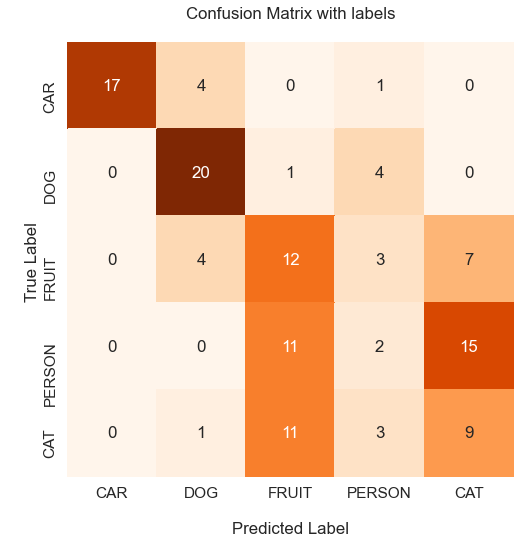

In [48]:
#evaluate best estimator
evaluate(clf,X_test,y_test)